In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

## connecting google drive to use dataset
#from google.colab import drive
#drive.mount('/content/drive')


#file_location = 'drive/MyDrive/fer2013/fer2013.csv'
#file_location = 'fer2013.csv'
#v1 - baseline from library 
#v2 is with just niha image at end.
#v3 
# v10 - 16 images in beginning. 
ver = 10
#1 - baseline shuffle = True
# tr15 img , random false (train, rem), random false (val, test)
mver = 'ff16'
shuffle_setting = False
#file_location = 'fer2013.v'+str(ver)+'.csv'
file_location ='code2\\tr_data.csv'
print(file_location)
bres=48

# load data function is used to load data from the CSV file and return images and labels in the form of one hot encoded value


def load_data():
  # loading dataset as Dataframe
  dataset = pd.read_csv(file_location)
  images = []
  # converting each image data to float and reshaping it to 48 x 48
  nrow=0
  for img in dataset.pixels:
    nrow += 1
    if (nrow%100 == 0 ): 
        print("... row # {}".format(nrow))
    reshapedImage = np.fromstring(img, dtype=float, sep=' ').reshape(bres, bres)
    # append all images
    images.append(reshapedImage);

  # converting labels to one hot encoded values of float32
  emotions = pd.get_dummies(dataset.emotion).values.astype('float32')
  # return processed images and emotions
  return images, emotions

np.random.seed(100)
images, emotions = load_data()

# Splitting data into train, test and validation
X_train, X_rem, y_train, y_rem = train_test_split(images, emotions, train_size=0.8, shuffle=shuffle_setting)

code2\tr_data.csv
... row # 100
... row # 200
... row # 300
... row # 400
... row # 500
... row # 600
... row # 700


In [2]:
# Splitting remaining data in half as validation and test data
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle=shuffle_setting)

# this function is used to change the data mean to 0 and standard deviation to 1
def standarize_data(data):
    # convert data to float32
    data = np.array(data, 'float32')
    # subtract mean from the data
    data -= np.mean(data, axis=0)
    # dividing the data with standard deviation
    data /= np.std(data, axis=0)
    return data

# standardizing all data
X_train = standarize_data(X_train)
X_test = standarize_data(X_test)
X_valid = standarize_data(X_valid)

# reshaping data into image
X_train = X_train.reshape(X_train.shape[0], bres,bres,1)
X_test = X_test.reshape(X_test.shape[0],    bres, bres,1)
X_valid = X_valid.reshape(X_valid.shape[0], bres, bres,1)

C:\Users\mail2\AppData\Local\Temp\ipykernel_28236\1322552191.py:12: RuntimeWarning: invalid value encountered in divide
  data /= np.std(data, axis=0)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [4]:
#parameters for number of training epochs and path to store and load the notebook
epochs = 70
path = './'

In [5]:
# it is used to generate image using ImageDataGenerator
# It rotates the image in 20 degree range, shift the width and height, flip the image horizontally, and zoom the image
image_augmentation = ImageDataGenerator(
                        rotation_range=20,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        horizontal_flip=True,
                        featurewise_std_normalization=False,
                        zoom_range=.2
                        )

# Model structure

In [6]:
# Defining model Structure
model = Sequential()

# Each block contain same type of layers, the only difference being the filter in Conv2D layer
# Block 1
# Input layer with input shape of 48 x 48 x 1 and 32 filters
model.add(Conv2D(32,(3,3),padding='same' ,input_shape=(bres, bres,1), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 3
model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 4
model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Dense Network
# the data from the previous layer is flattened and is passed to Dense layer
model.add(Flatten())
# Dense layer with 256 neurons
model.add(Dense(256, activation='relu'))
# Dense layer with 128 neurons
model.add(Dense(128, activation='relu'))
# Dense layer with 64 neurons
model.add(Dense(64, activation='relu'))

# Output layer that returns probability distribution
model.add(Dense(7, activation='softmax'))

In [7]:
# defining loss function, optimizer, and metrics
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# displaying the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                        

In [8]:
#callbacks
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
log_file_path = path + 'emotion.log'

# Logging the model output in a log file and storing it in Drive
csv_logger = CSVLogger(log_file_path, append=False)

# Stopping the model if the validation loss does not increase over during 5 epochs
early_stop = EarlyStopping(monitor='val_loss',
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

# Store the values of model during training so it can be loaded in the model
checkpoint = ModelCheckpoint(path + 'emotion.ckpt',
                             save_weights_only=True,
                             verbose=1)

callbacks = [csv_logger, early_stop, checkpoint]

# Model training

In [9]:
# Training the model using augmented data created with Training data
m = model.fit(image_augmentation.flow(X_train, y_train, 64), 
                    # data for validation
                    validation_data = (X_valid, y_valid),
                    # shuffling the data
                    shuffle = True,
                    # display the training process and the data
                    verbose = 1,
                    # number of rounds to train
                    epochs = epochs, 
                    steps_per_epoch = len(X_train)/64,
                    callbacks = callbacks)

Epoch 1/70
10/9 [==============================] - ETA: 0s - loss: nan - accuracy: 0.6905
Epoch 1: saving model to .\emotion.ckpt
9/9 [==============================] - 4s 284ms/step - loss: nan - accuracy: 0.6905 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/70
10/9 [==============================] - ETA: 0s - loss: nan - accuracy: 0.6905
Epoch 2: saving model to .\emotion.ckpt
9/9 [==============================] - 3s 264ms/step - loss: nan - accuracy: 0.6905 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/70
10/9 [==============================] - ETA: 0s - loss: nan - accuracy: 0.6905
Epoch 3: saving model to .\emotion.ckpt
9/9 [==============================] - 3s 260ms/step - loss: nan - accuracy: 0.6905 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/70
10/9 [==============================] - ETA: 0s - loss: nan - accuracy: 0.6905
Epoch 4: saving model to .\emotion.ckpt
9/9 [==============================] - 3s 259ms/step - loss: nan - accuracy: 0.6905 - val_loss: nan

In [10]:
# Evaluate model with test data
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.0000e+00


[nan, 0.0]

In [11]:

# Saving model using in drive
#model.save('./emotion_'+str(bres)+'v'+str(ver)+"_mver_"+mver+'.hdf5')
model.save('./emotion_'+str(bres)+'vNEW'+'.hdf5')

# Data visualization

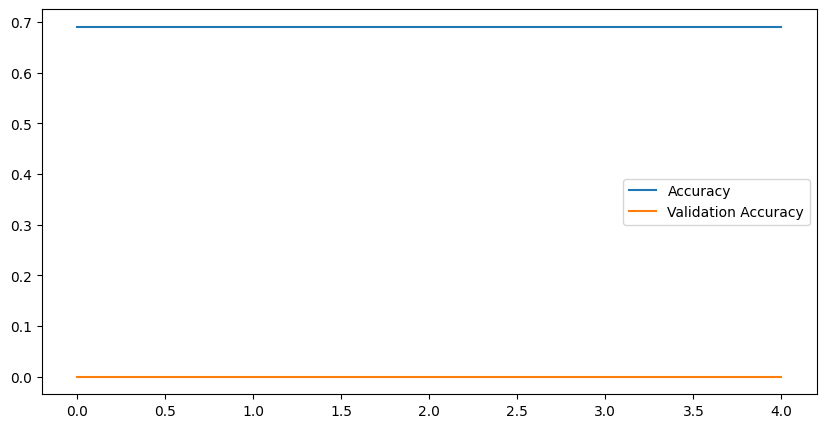

In [12]:
# Read the log file from the drive
log = pd.read_csv('./emotion.log')

# Plotting the figure of accuracy and validation accuracy over epoch
plt.figure(figsize=(10,5))
# Plot the data from the model
plt.plot(m.history['accuracy'], label='Accuracy')
plt.plot(m.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

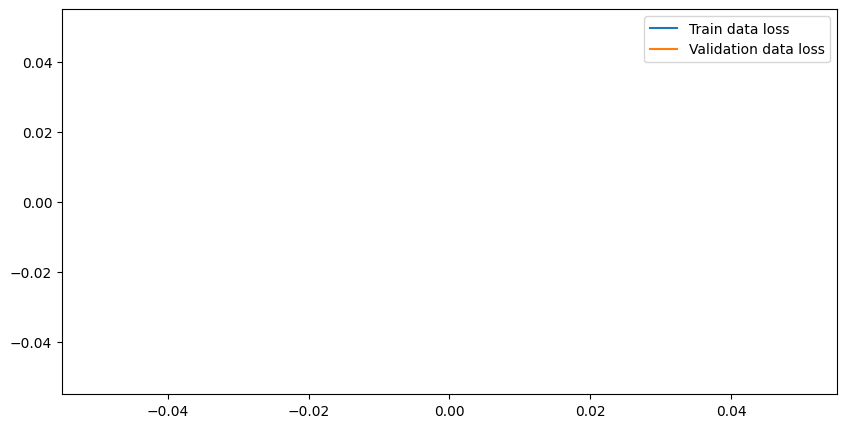

In [13]:
# Plot of Training data loss and Validation data loss
plt.figure(figsize=(10,5))
plt.plot(m.history['loss'], label='Train data loss')
plt.plot(m.history['val_loss'], label='Validation data loss')
plt.legend()

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predicting the test data
test_data_prediction = model.predict(X_test).argmax(axis=1)

# converting the one hot encoded labels to single value labels
label_x_test = np.array(y_test)
label_x_test = np.where(label_x_test)[1]

3/3 [==============================] - 0s 16ms/step


<AxesSubplot: >

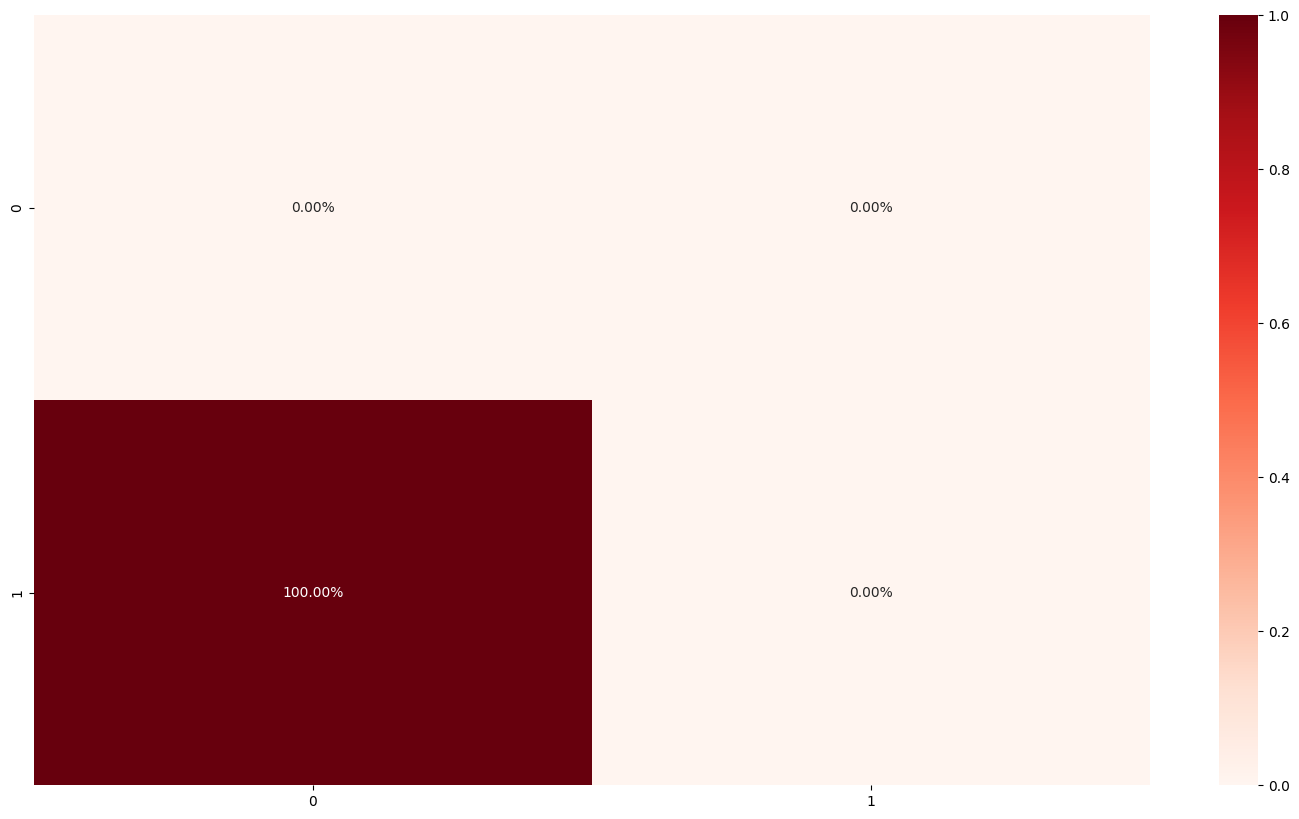

In [15]:
# Get values of confusion matrix using the confusion_matrix function from sklearn.metrics
confusion_matrix_values = confusion_matrix(label_x_test, test_data_prediction)
plt.figure(figsize = (18,10))
# generate a heatmap using seaborn and display the data in terms of percentage
sns.heatmap(confusion_matrix_values/np.sum(confusion_matrix_values), 
            annot=True, fmt='0.2%', cmap='Reds')

<AxesSubplot: xlabel='emotion', ylabel='count'>

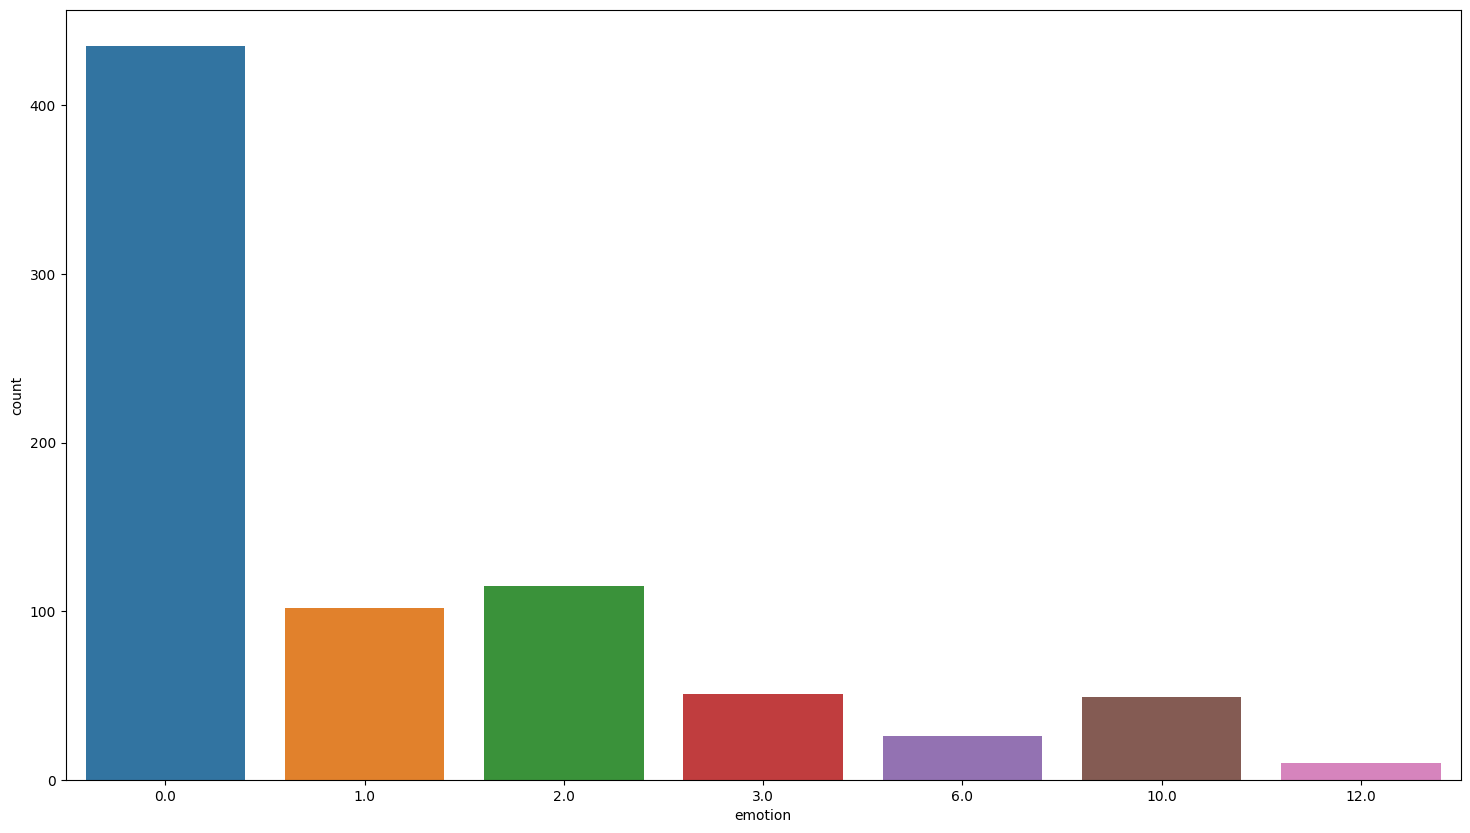

In [16]:

# Count Plot
# Displays the number of data in each labels
plt.figure(figsize = (18,10))
dataset = pd.read_csv(file_location)
# Plot using countplot
sns.countplot(x='emotion', data = dataset)
# 'Disgust' has the lowest number of data whereas 'Happy' has the highest

# Prediction

In [17]:
# defining emotions
expressions = ["angry","disgust","scared", "happy", "sad", "surprised","neutral"]
expressions = range(15)
from PIL import Image
import cv2

mver = 'ff16'
shuffle_setting = False
file_location = 'fer2013.v'+str(ver)+'.csv'
file = ".//img//IMG-3721.jpg"
# base model with all lib picture
mfile = 'emotion.hdf5'
# model with 1 niha picture
mfile = 'emotion_48v2.hdf5'
# model with 8 pictures
mfile = 'emotion_48v3.hdf5'
# generic version based 
#mfile = 'emotion_'+str(bres)+'v'+str(ver).hdf5'
mver="ff16"
ver=10
mfile='emotion_'+str(bres)+'v'+str(ver)+"_mver_"+mver+'.hdf5'
mfile = 'emotion_48vNEW.hdf5'
import tensorflow as tf 
# model with all lib picture
model = tf.keras.models.load_model(mfile)


# Check its architecture
#new_model.summary()
#model = new_model
# Function to predict test data and display the image including the actual and model predicted values
def predict(val, flg=0, v=-1, mver="ttnn"):
  # reshaping the test data to array of image
  img = X_test[val].reshape(1,bres,bres,1)
  #print(type(img))
  # plot the image in graph
  if flg & 8:
        print(X_test[val])
        #print('type:', type(img[0][0][0]), ' len:', len(img[0][0][0]))
        #for i in range(bres):
        #    s1 = ' '.join([str(*img[0][i][j]) for j in range(bres)])
        #    print(s1)
  plt.imshow(X_test[val].reshape(bres, bres) ,cmap='gray')
  plt.show()
  # display the actual and predicted values
  print("Actual : ", expressions[np.argmax(y_test[val])])
  if v > -1:
       tmpmodel = tf.keras.models.load_model('emotion_'+str(bres)+'v'+str(ver)+"_mver_"+mver+'.hdf5')
  else:
       tmpmodel = model                                         
  print("Predicted: ",expressions[np.argmax(tmpmodel.predict(img)[0])]) 

In [19]:
def predictimg(fname, flg=27, v=-1, mver="ttnn"): 
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    #cv2.imshow('orig',img)
    img4 = cv2.resize(img, (bres,bres))
    #type(img45
    img5=img4.reshape(1,bres, bres,1)
    if flg & 8:
        print('type:', type(img5[0][0][0]), ' len:', len(img5[0][0][0]))
        for i in range(bres):
            s1 = ' '.join([str(*img5[0][i][j]) for j in range(bres)])
            print(s1)
    if v > -1:
        tmpmodel = tf.keras.models.load_model('emotion_'+str(bres)+'v'+str(ver)+"_mver_"+mver+'.hdf5')
    else:
        tmpmodel = model      
    
    if flg & 2:
        plt.imshow(img5.reshape(bres, bres) )#,cmap='gray')
        plt.show()
    if flg & 16:
        img6 = standarize_data(img4)
        img7 = img6.reshape(1,bres, bres, 1)
        #plt.imshow(img6.reshape(bres,bres))
        #plt.show()
    else:
        img7 = img5
    prediction = expressions[np.argmax(tmpmodel.predict(img7)[0])]
    if flg & 1:
        print('file {0} prediction is {1}'.format(fname, prediction))
    return prediction

#predict(3)
#predictimg(".//img//test_3.jpg", flg=19)
#predictimg(".//img//nihasad_t.jpg", flg=18, v=5, mver="ttnn")
#predictimg(".//code2//subflat//VW121T1AAAFF071.png", 19)

20


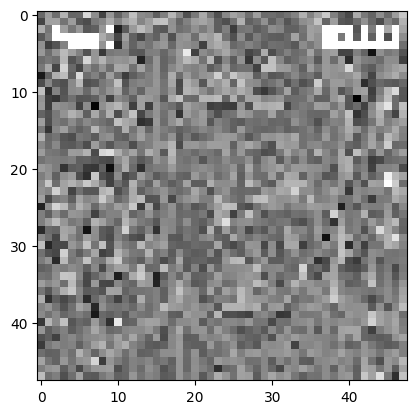

Actual :  2
1/1 [==============================] - 0s 175ms/step
Predicted:  0
21


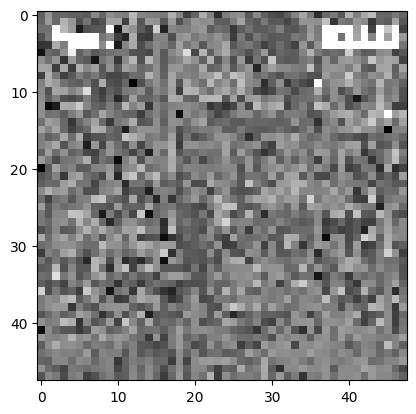

Actual :  2
1/1 [==============================] - 0s 25ms/step
Predicted:  0
22


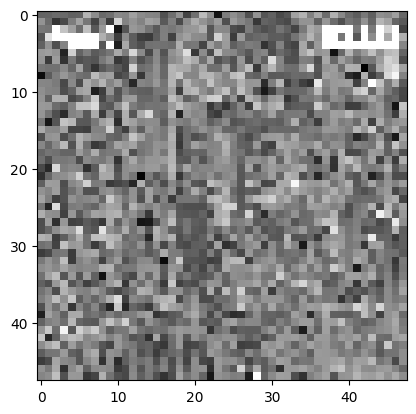

Actual :  2
1/1 [==============================] - 0s 31ms/step
Predicted:  0
23


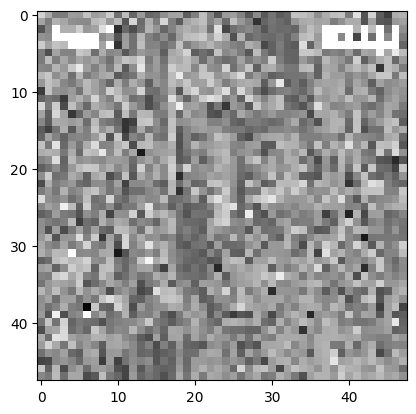

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
24


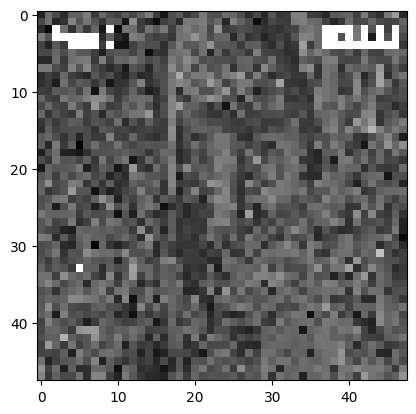

Actual :  2
1/1 [==============================] - 0s 32ms/step
Predicted:  0
25


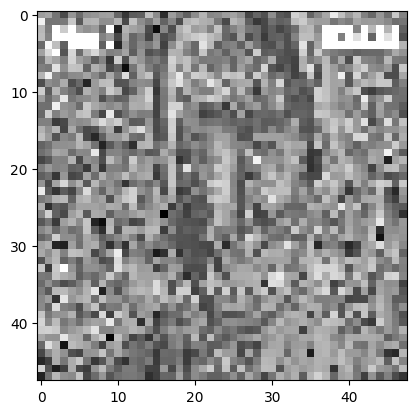

Actual :  2
1/1 [==============================] - 0s 15ms/step
Predicted:  0
26


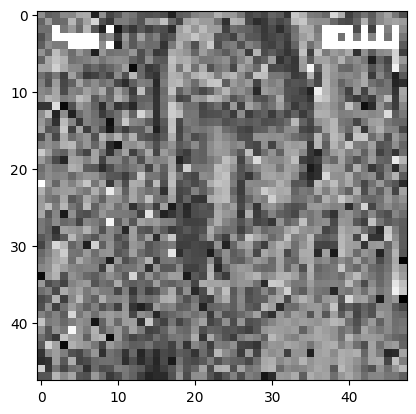

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
27


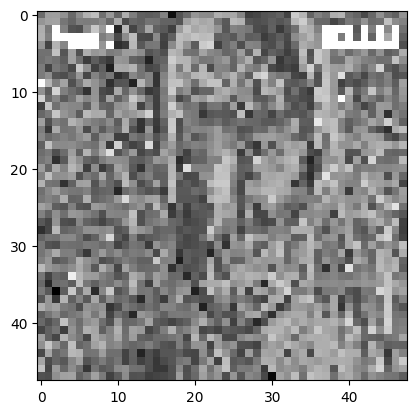

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
28


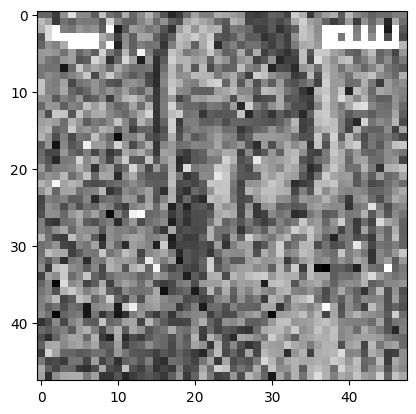

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
29


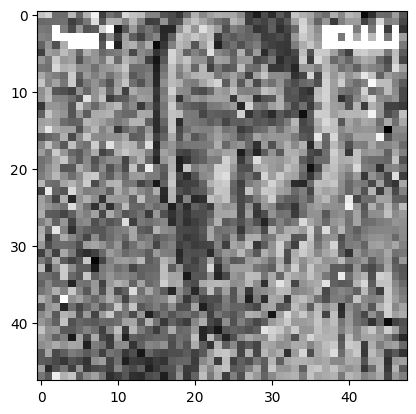

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
30


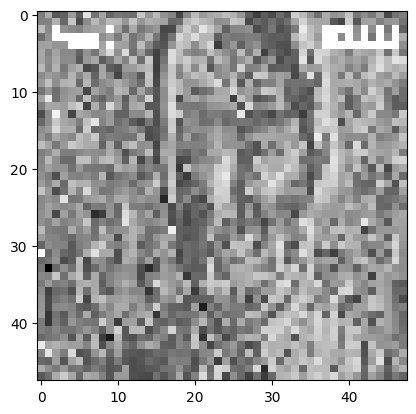

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
31


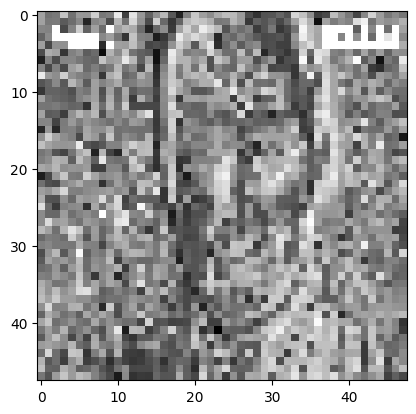

Actual :  2
1/1 [==============================] - 0s 25ms/step
Predicted:  0
32


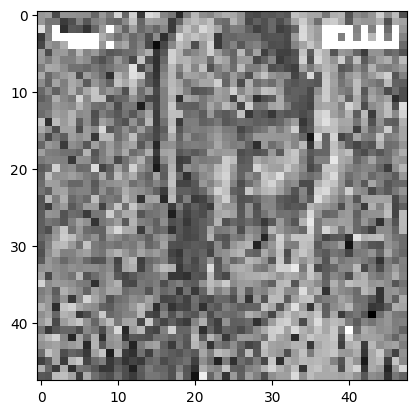

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
33


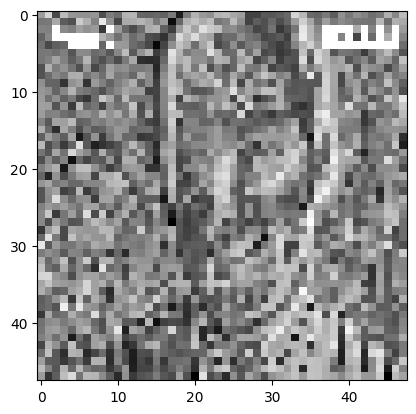

Actual :  2
1/1 [==============================] - 0s 17ms/step
Predicted:  0
34


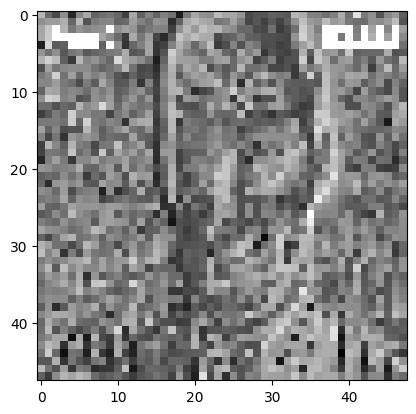

Actual :  2
1/1 [==============================] - 0s 22ms/step
Predicted:  0
35


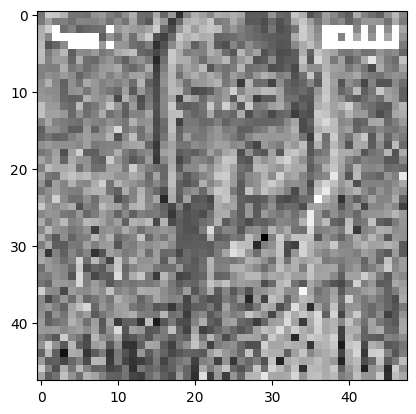

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
36


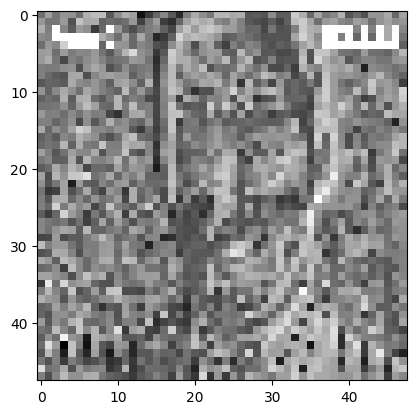

Actual :  2
1/1 [==============================] - 0s 35ms/step
Predicted:  0
37


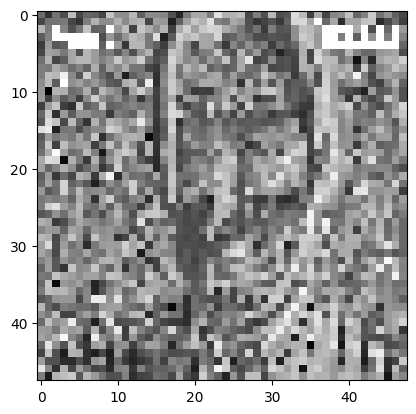

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
38


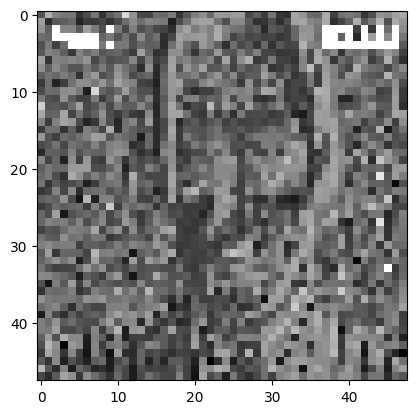

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0
39


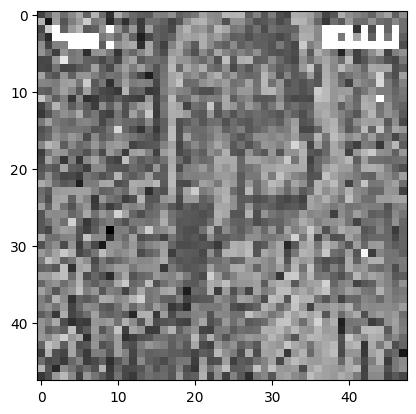

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0


In [20]:
for i in range(20,40):
    print(i)
    predict(i)

In [21]:
#predict(3, 8)
#predictimg(".//img//test_3.jpg" , 11)
#predictimg("//img//edited48.jpg", 1)
#predictimg(".//img//ni_happy_orig.jpg", 19)
#predictimg(".//img//nihasad.jpg", 19)
#predictimg(".//img//nihasurprised.jpg", 19)

In [22]:
flg = 16+1
v = -1


o1=predictimg(".//img//michaelangry_t.jpg", flg, v = v)
o2=predictimg(".//img//michaelneutral_t.jpg", flg, v = v)
o3=predictimg(".//img//michaelsad_t.jpg", flg, v = v)
o4=predictimg(".//img//michaelscared2_26_t.jpg", flg, v = v)
o5=predictimg(".//img//michaelsurprised2_26_t.jpg", flg, v = v)
o6=predictimg(".//img//ni_happy_orig_t.jpg", flg, v = v)
o7=predictimg(".//img//nihaangry1_26_t.jpg", flg, v = v)
o8=predictimg(".//img//nihadisgust1_26_t.jpg", flg, v = v)
o9=predictimg(".//img//nihasad_t.jpg", flg, v = v)


numop = (o1=="angry")     + (o2=="neutral")+(o3=="sad") + (o4=="scared") + (o5=="surprised")  + (o6=="happy")+    (o7=="angry")  + (o8=="disgust")    + (o9=="sad") 

flg, v, numop, numop*100/9

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
(17, -1, 3, 33.333333333333336) tt16 v10                       [ ,2, , , ,6, , ,9]
(17, -1, 4, 44.44444444444444)  ff16 v10                       [ ,2, , , ,6,7, ,9]
(17, 1, 3, 33.333333333333336)                                 [ ,2, , , ,6, , ,9]
(17, 2, 4, 44.44444444444444)
(17, 3, 4, 44.44444444444444) 7img + true                      [ ,2,3, , ,6, , ,9]
(17, 4, 4, 44.44444444444444) 7img on top (training) + false   [1,2, , , ,6, , ,9]
(17, 5, 5, 55.55555555555556) v4 but True                      [ ,2,3, , ,6,7, ,9]


1/1 [==============================] - 1s 512ms/step
file .//img//michaelangry_t.jpg prediction is neutral
1/1 [==============================] - 0s 438ms/step
file .//img//michaelneutral_t.jpg prediction is neutral
1/1 [==============================] - 0s 457ms/step
file .//img//michaelsad_t.jpg prediction is sad
1/1 [==============================] - 0s 446ms/step
file .//img//michaelscared2_26_t.jpg prediction is neutral
1/1 [==============================] - 0s 452ms/step
file .//img//michaelsurprised2_26_t.jpg prediction is angry
1/1 [==============================] - 0s 451ms/step
file .//img//ni_happy_orig_t.jpg prediction is happy
1/1 [==============================] - 1s 558ms/step
file .//img//nihaangry1_26_t.jpg prediction is angry
1/1 [==============================] - 0s 449ms/step
file .//img//nihadisgust1_26_t.jpg prediction is sad
1/1 [==============================] - 0s 448ms/step
file .//img//nihasad_t.jpg prediction is sad
(17, 5, 5, 55.55555555555556)
1/1 [==============================] - 1s 766ms/step
file .//img//michaelangry_t.jpg prediction is angry
1/1 [==============================] - 0s 468ms/step
file .//img//michaelneutral_t.jpg prediction is neutral
1/1 [==============================] - 0s 438ms/step
file .//img//michaelsad_t.jpg prediction is neutral
1/1 [==============================] - 0s 434ms/step
file .//img//michaelscared2_26_t.jpg prediction is sad
1/1 [==============================] - 1s 780ms/step
file .//img//michaelsurprised2_26_t.jpg prediction is angry
1/1 [==============================] - 0s 446ms/step
file .//img//ni_happy_orig_t.jpg prediction is happy
1/1 [==============================] - 0s 451ms/step
file .//img//nihaangry1_26_t.jpg prediction is sad
1/1 [==============================] - 0s 437ms/step
file .//img//nihadisgust1_26_t.jpg prediction is happy
1/1 [==============================] - 0s 428ms/step
file .//img//nihasad_t.jpg prediction is sad
(17, 4, 4, 44.44444444444444)
1/1 [==============================] - 1s 558ms/step
file .//img//michaelangry_t.jpg prediction is neutral
1/1 [==============================] - 0s 449ms/step
file .//img//michaelneutral_t.jpg prediction is neutral
1/1 [==============================] - 0s 472ms/step
file .//img//michaelsad_t.jpg prediction is sad
1/1 [==============================] - 0s 452ms/step
file .//img//michaelscared2_26_t.jpg prediction is neutral
1/1 [==============================] - 0s 449ms/step
file .//img//michaelsurprised2_26_t.jpg prediction is happy
1/1 [==============================] - 0s 460ms/step
file .//img//ni_happy_orig_t.jpg prediction is happy
1/1 [==============================] - 0s 446ms/step
file .//img//nihaangry1_26_t.jpg prediction is neutral
1/1 [==============================] - 0s 476ms/step
file .//img//nihadisgust1_26_t.jpg prediction is happy
1/1 [==============================] - 0s 440ms/step
file .//img//nihasad_t.jpg prediction is sad
(17, 3, 4, 44.44444444444444)

1/1 [==============================] - 1s 648ms/step
file .//img//michaelangry_t.jpg prediction is neutral
1/1 [==============================] - 1s 639ms/step
file .//img//michaelneutral_t.jpg prediction is neutral
1/1 [==============================] - 0s 455ms/step
file .//img//michaelsad_t.jpg prediction is neutral
1/1 [==============================] - 0s 447ms/step
file .//img//michaelscared2_26_t.jpg prediction is neutral
1/1 [==============================] - 0s 466ms/step
file .//img//michaelsurprised2_26_t.jpg prediction is angry
1/1 [==============================] - 0s 445ms/step
file .//img//ni_happy_orig_t.jpg prediction is happy
1/1 [==============================] - 0s 454ms/step
file .//img//nihaangry1_26_t.jpg prediction is angry
1/1 [==============================] - 1s 527ms/step
file .//img//nihadisgust1_26_t.jpg prediction is happy
1/1 [==============================] - 0s 442ms/step
file .//img//nihasad_t.jpg prediction is sad
(17, 2, 4, 44.44444444444444)

# (17, 3, 6, 75.0)
# (1, 3, 2, 25.0)
#  (1, 2, 2, 25.0)
# (17, 2, 5, 62.5)
# (17, 1, 5, 62.5)
# (1, 1, 0, 0.0)
# (17, 4, 6, 75.0), 64.29

In [24]:
# code to create byte dump for training data
iplst = ["train_michaeldisgust.jpg",
"train_michaeldisgust2_26.jpg",
"train_michaelhappy.jpg",
"train_michaelhappy2_26.jpg",
"train_michaelneutral2_26.jpg",
"train_michaelsad2_26.jpg",
"train_michaelscared1_26.jpg",
"train_michaelsurprised1_26.jpg",
"train_nihaangry2_26.jpg",
"train_nihadisgust2_26.jpg",
"train_nihaneutral1_26.jpg",
"train_nihascared1_26.jpg",
"train_nihascared2_26.jpg",
"train_nihasurprised.jpg",
"train_nihahappy.jpg",
"train_nihasad2_26.jpg"]

# 4    3 2 1 0
# 0- print predcition
# 1 - img show
# 3 - dump 
# 4 - standardizatin
#for i in iplst:
   #predictimg(".\\img\\"+i, flg=1+8)


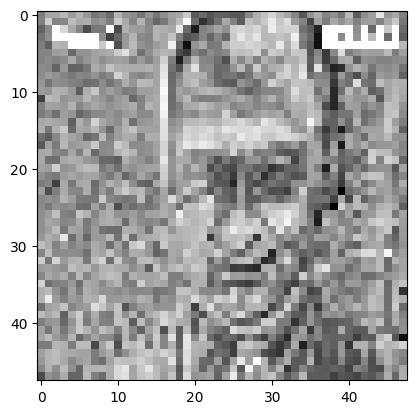

Actual :  2
1/1 [==============================] - 0s 36ms/step
Predicted:  0


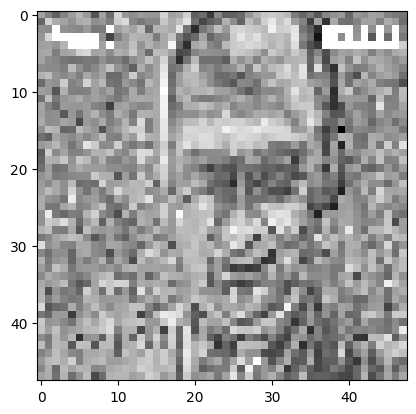

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0


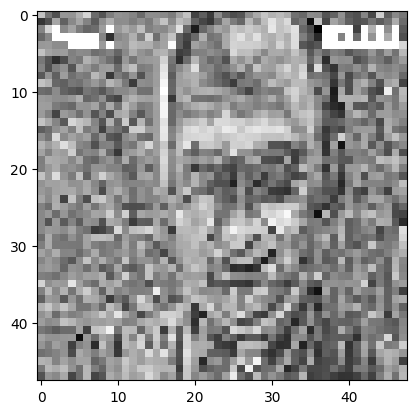

Actual :  2
1/1 [==============================] - 0s 16ms/step
Predicted:  0


In [25]:
val = 1
l = [val,4,5,10,23]
for i in range(val, val+3):
    predict(i)

In [26]:
#img = X_test[val].reshape(1,bres, bres,1)

#type(X_test[val]), img

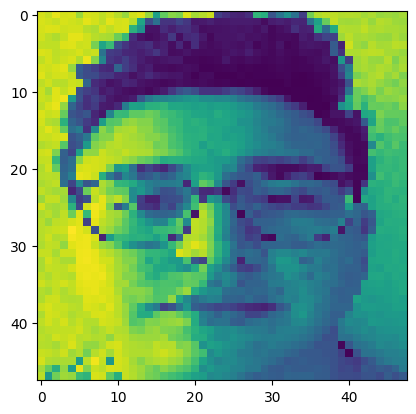

1/1 [==============================] - 0s 31ms/step
file .//img//michael-1.png prediction is 0


0

In [27]:
predictimg(".//img//michael-1.png", 19)



-----> IMG-3721.jpg


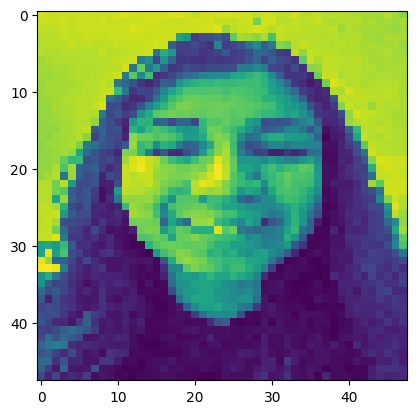

1/1 [==============================] - 0s 17ms/step
file .//img//IMG-3721.jpg prediction is 0
-----> IMG-3722.jpg


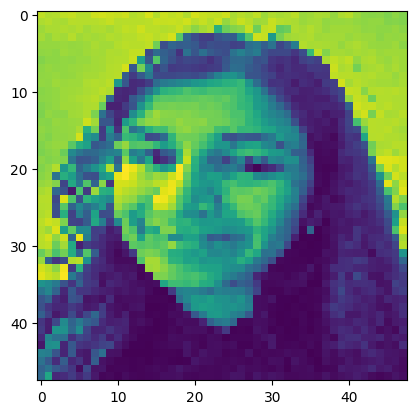

1/1 [==============================] - 0s 16ms/step
file .//img//IMG-3722.jpg prediction is 0
-----> IMG-3723.jpg


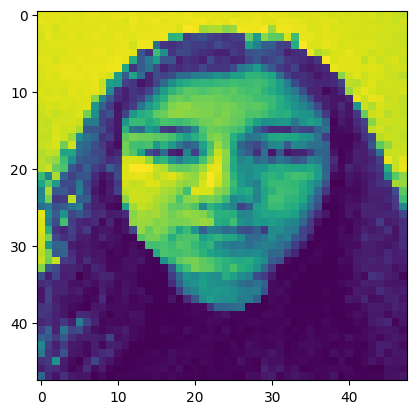

1/1 [==============================] - 0s 31ms/step
file .//img//IMG-3723.jpg prediction is 0
-----> IMG-3724.jpg


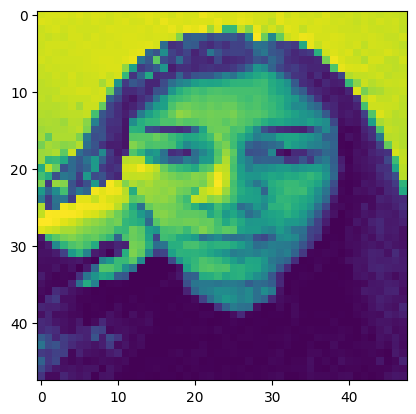

1/1 [==============================] - 0s 16ms/step
file .//img//IMG-3724.jpg prediction is 0
-----> IMG-3725.jpg


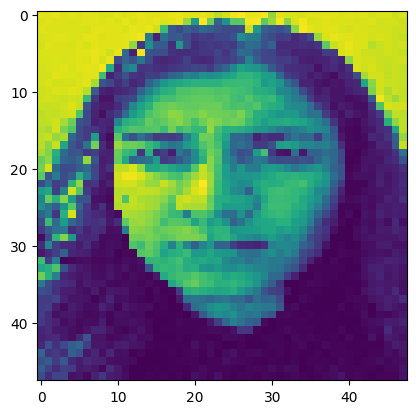

1/1 [==============================] - 0s 16ms/step
file .//img//IMG-3725.jpg prediction is 0
-----> IMG-3726.jpg


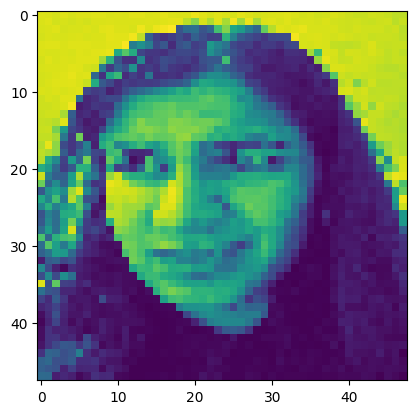

1/1 [==============================] - 0s 31ms/step
file .//img//IMG-3726.jpg prediction is 0
-----> IMG-3727.jpg


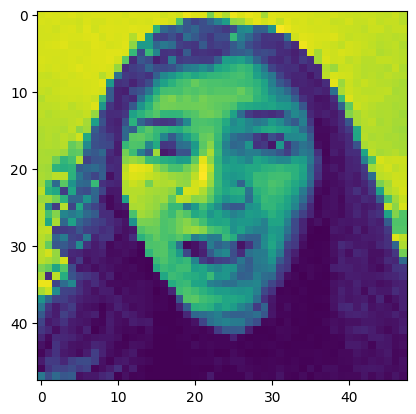

1/1 [==============================] - 0s 32ms/step
file .//img//IMG-3727.jpg prediction is 0
-----> IMG-3729.jpg


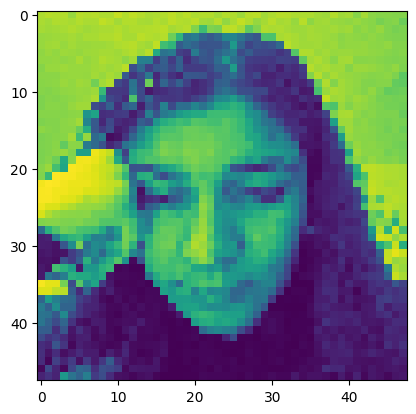

1/1 [==============================] - 0s 16ms/step
file .//img//IMG-3729.jpg prediction is 0
-----> IMG-3734.jpg


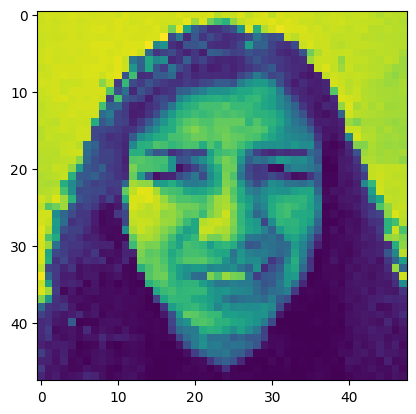

1/1 [==============================] - 0s 35ms/step
file .//img//IMG-3734.jpg prediction is 0
-----> IMG-3735.jpg


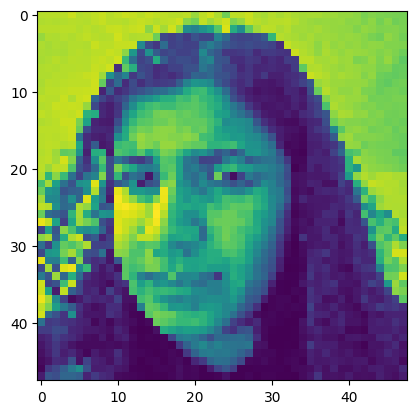

1/1 [==============================] - 0s 16ms/step
file .//img//IMG-3735.jpg prediction is 0
-----> IMG-3738.jpg


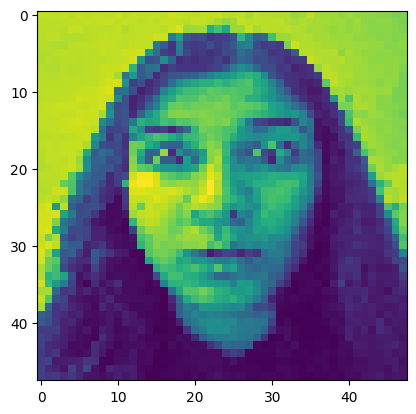

1/1 [==============================] - 0s 16ms/step
file .//img//IMG-3738.jpg prediction is 0
-----> IMG-3743.jpg


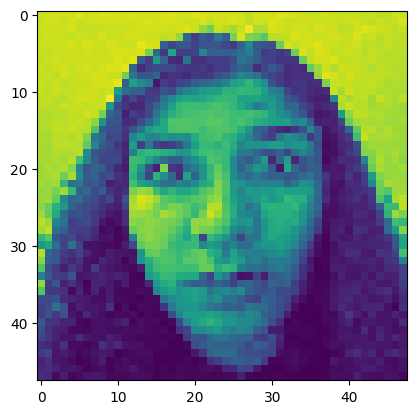

1/1 [==============================] - 0s 23ms/step
file .//img//IMG-3743.jpg prediction is 0


In [28]:
imglst = ['IMG-3721.jpg', 'IMG-3722.jpg', 'IMG-3723.jpg', 'IMG-3724.jpg', 
'IMG-3725.jpg', 'IMG-3726.jpg', 'IMG-3727.jpg', 
'IMG-3729.jpg', 'IMG-3734.jpg', 'IMG-3735.jpg', 
'IMG-3738.jpg', 'IMG-3743.jpg']

for i in imglst:
    print("----->", i)
    predictimg(".//img//"+i, 19)

In [29]:
v=3
predictimg(".//img//IMG-3721.paint.jpg", v=v)
predictimg(".//img//nihahappy.jpg", v=v)
predictimg(".//img//ni_happy_orig.jpg", v=v)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


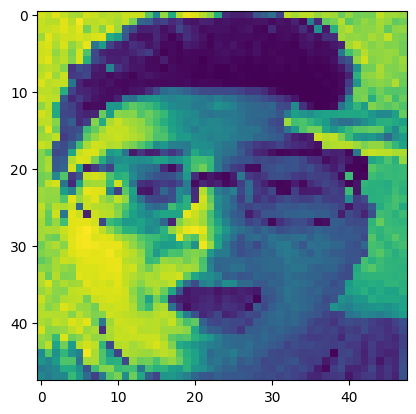

1/1 [==============================] - 0s 126ms/step
file .//img//IMG_5124.png prediction is 0


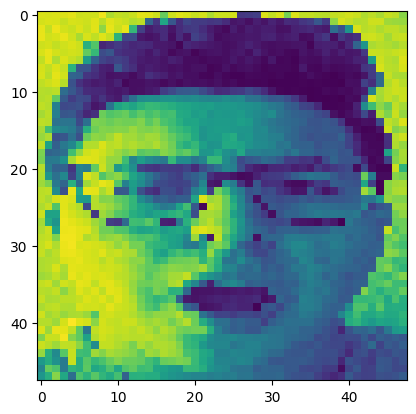

1/1 [==============================] - 0s 32ms/step
file .//img//IMG_5125.png prediction is 0


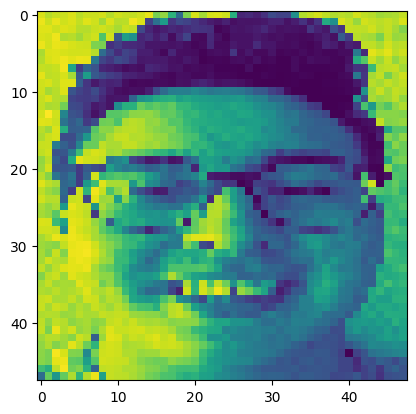

1/1 [==============================] - 0s 16ms/step
file .//img//IMG_5126.png prediction is 0


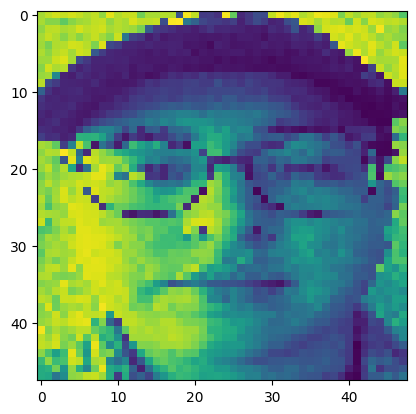

1/1 [==============================] - 0s 16ms/step
file .//img//IMG_5127.png prediction is 0


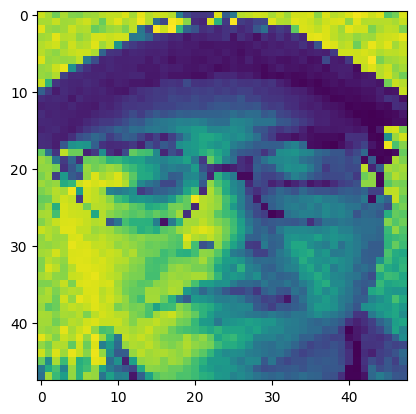

1/1 [==============================] - 0s 16ms/step
file .//img//IMG_5128.png prediction is 0


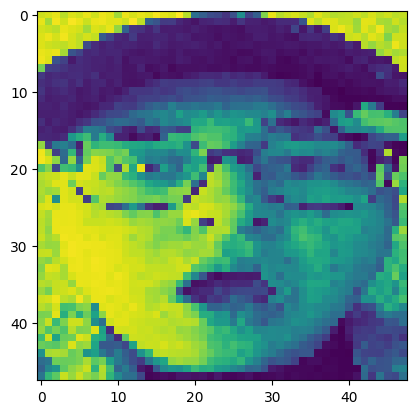

1/1 [==============================] - 0s 16ms/step
file .//img//IMG_5129.png prediction is 0


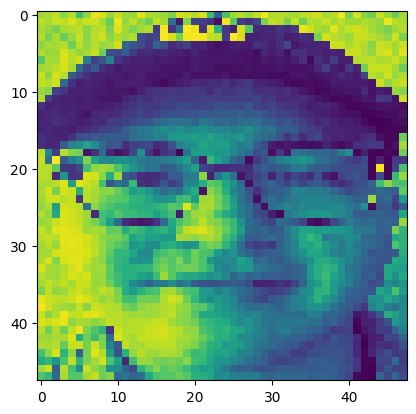

1/1 [==============================] - 0s 16ms/step
file .//img//IMG_5130.png prediction is 0


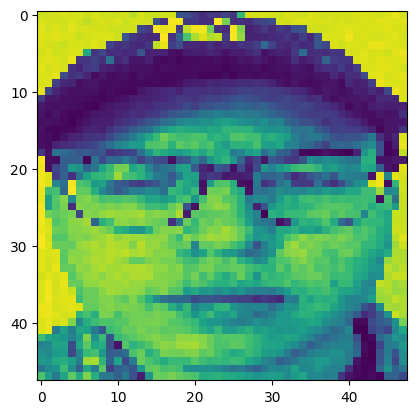

1/1 [==============================] - 0s 16ms/step
file .//img//IMG_5131.png prediction is 0


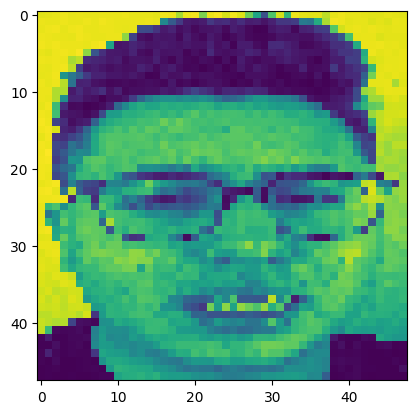

1/1 [==============================] - 0s 16ms/step
file .//img//IMG_5132.png prediction is 0


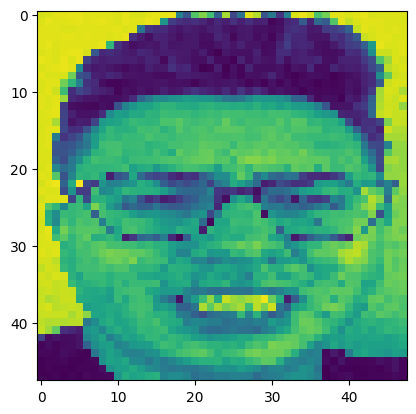

1/1 [==============================] - 0s 16ms/step
file .//img//IMG_5133.png prediction is 0


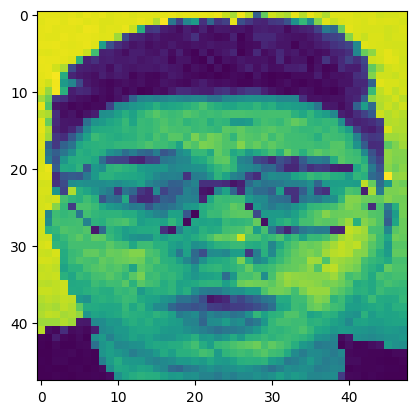

1/1 [==============================] - 0s 32ms/step
file .//img//IMG_5134.png prediction is 0


In [30]:
imglst = ['IMG_5124.png', 'IMG_5125.png', 'IMG_5126.png',
'IMG_5127.png', 'IMG_5128.png', 'IMG_5129.png',
'IMG_5130.png', 'IMG_5131.png', 'IMG_5132.png',
'IMG_5133.png', 'IMG_5134.png',]
for i in imglst:
    predictimg(".//img//"+i, 3)


In [31]:

def predictimg2(fname, flg=1):
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    #cv2.imshow('orig',img)
    img4 = cv2.resize(img, (bres,bres))
    #type(img4)
    img4=img4.reshape(1,bres, bres,1)
    prediction = expressions[np.argmax(model.predict(img4)[0])]
    if flg & 2:
        plt.imshow(img4.reshape(bres, bres) ,cmap='gray')
        plt.show()
    if flg & 1:
        print('file {0} prediction is {1}'.format(fname, prediction))
    return prediction

1/1 [==============================] - 0s 31ms/step


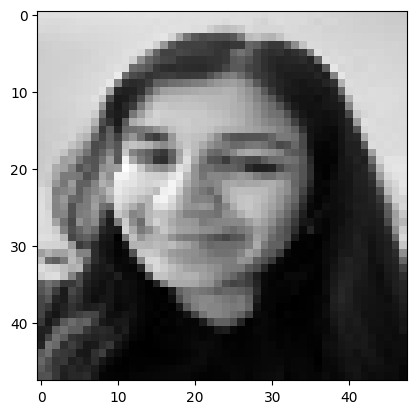

file .//img//ni_happy_down_48x48.jpg prediction is 0


In [32]:
imglst = ['ni_happy_down_48x48.jpg']

for i in imglst:
    predictimg2(".//img//"+i, 3)

In [33]:
predictimg(".//img//michaelhappy.jpg",3,v=4)

OSError: No file or directory found at emotion_48v10_mver_ttnn.hdf5